In [1]:
import pandas as pd
import seaborn as sns
import jsonlines

In [2]:
def add_rolling_mean(df, columns, window, groupby, sortby):
    rolling = df.sort_values(sortby).groupby(groupby)[columns].rolling(window=window).mean()
    rolling.index = rolling.index.droplevel(level=0)
    rolling_columns = [f'{c}_rolling' for c in columns]
    df[rolling_columns] = rolling
    return df

In [3]:
df = pd.read_parquet('../runs/heuristic_tabular/heuristic_only/metrics.parquet')

In [4]:
df.head(2)

label.batch  label.eps label.networktype label.project  \
0  test_djx_heuristic  fixed0.10             full5      ai_vs_ci   
1  test_djx_heuristic  fixed0.10             full5      ai_vs_ci   

   label.self_weight  _step  episode   mode  episode_step  ai_eps  ci_eps  \
0                1.0      0        0  train             0     0.2     0.1   
1                1.0      0        0  train             0     0.2     0.1   

    done agent_type                   createdAt  avg_reward  \
0  False         ci  2020-07-27T10:51:03.341859         0.0   
1  False         ci  2020-07-27T10:51:03.341964         NaN   

   avg_episode_rewards  coordinations  rewards  episode_rewards  catches  
0                  0.0            0.6      NaN              NaN      NaN  
1                  NaN            NaN      0.0              0.0      NaN

In [5]:
len(df)

31008000

In [6]:
df.columns

Index(['label.batch', 'label.eps', 'label.networktype', 'label.project',
       'label.self_weight', '_step', 'episode', 'mode', 'episode_step',
       'ai_eps', 'ci_eps', 'done', 'agent_type', 'createdAt', 'avg_reward',
       'avg_episode_rewards', 'coordinations', 'rewards', 'episode_rewards',
       'catches'],
      dtype='object')

In [7]:
label_columns = ['label.batch', 'label.eps', 'label.networktype', 'label.project',
       'label.self_weight']

In [8]:
print(df['label.eps'].unique())
print(df['label.networktype'].unique())

['fixed0.10' 'decay' 'fixed0.20' 'fixed0.05']
['full5' 'full3' 'cycle62' 'cycle64' 'full4' 'full2']


In [9]:
eps_order = ['fixed0.05', 'fixed0.10', 'fixed0.20', 'decay']
networktype_order = ['full2', 'full3', 'full4', 'full5', 'cycle62', 'cycle64']

In [10]:
dft = df[~df['avg_reward'].isnull()].copy()

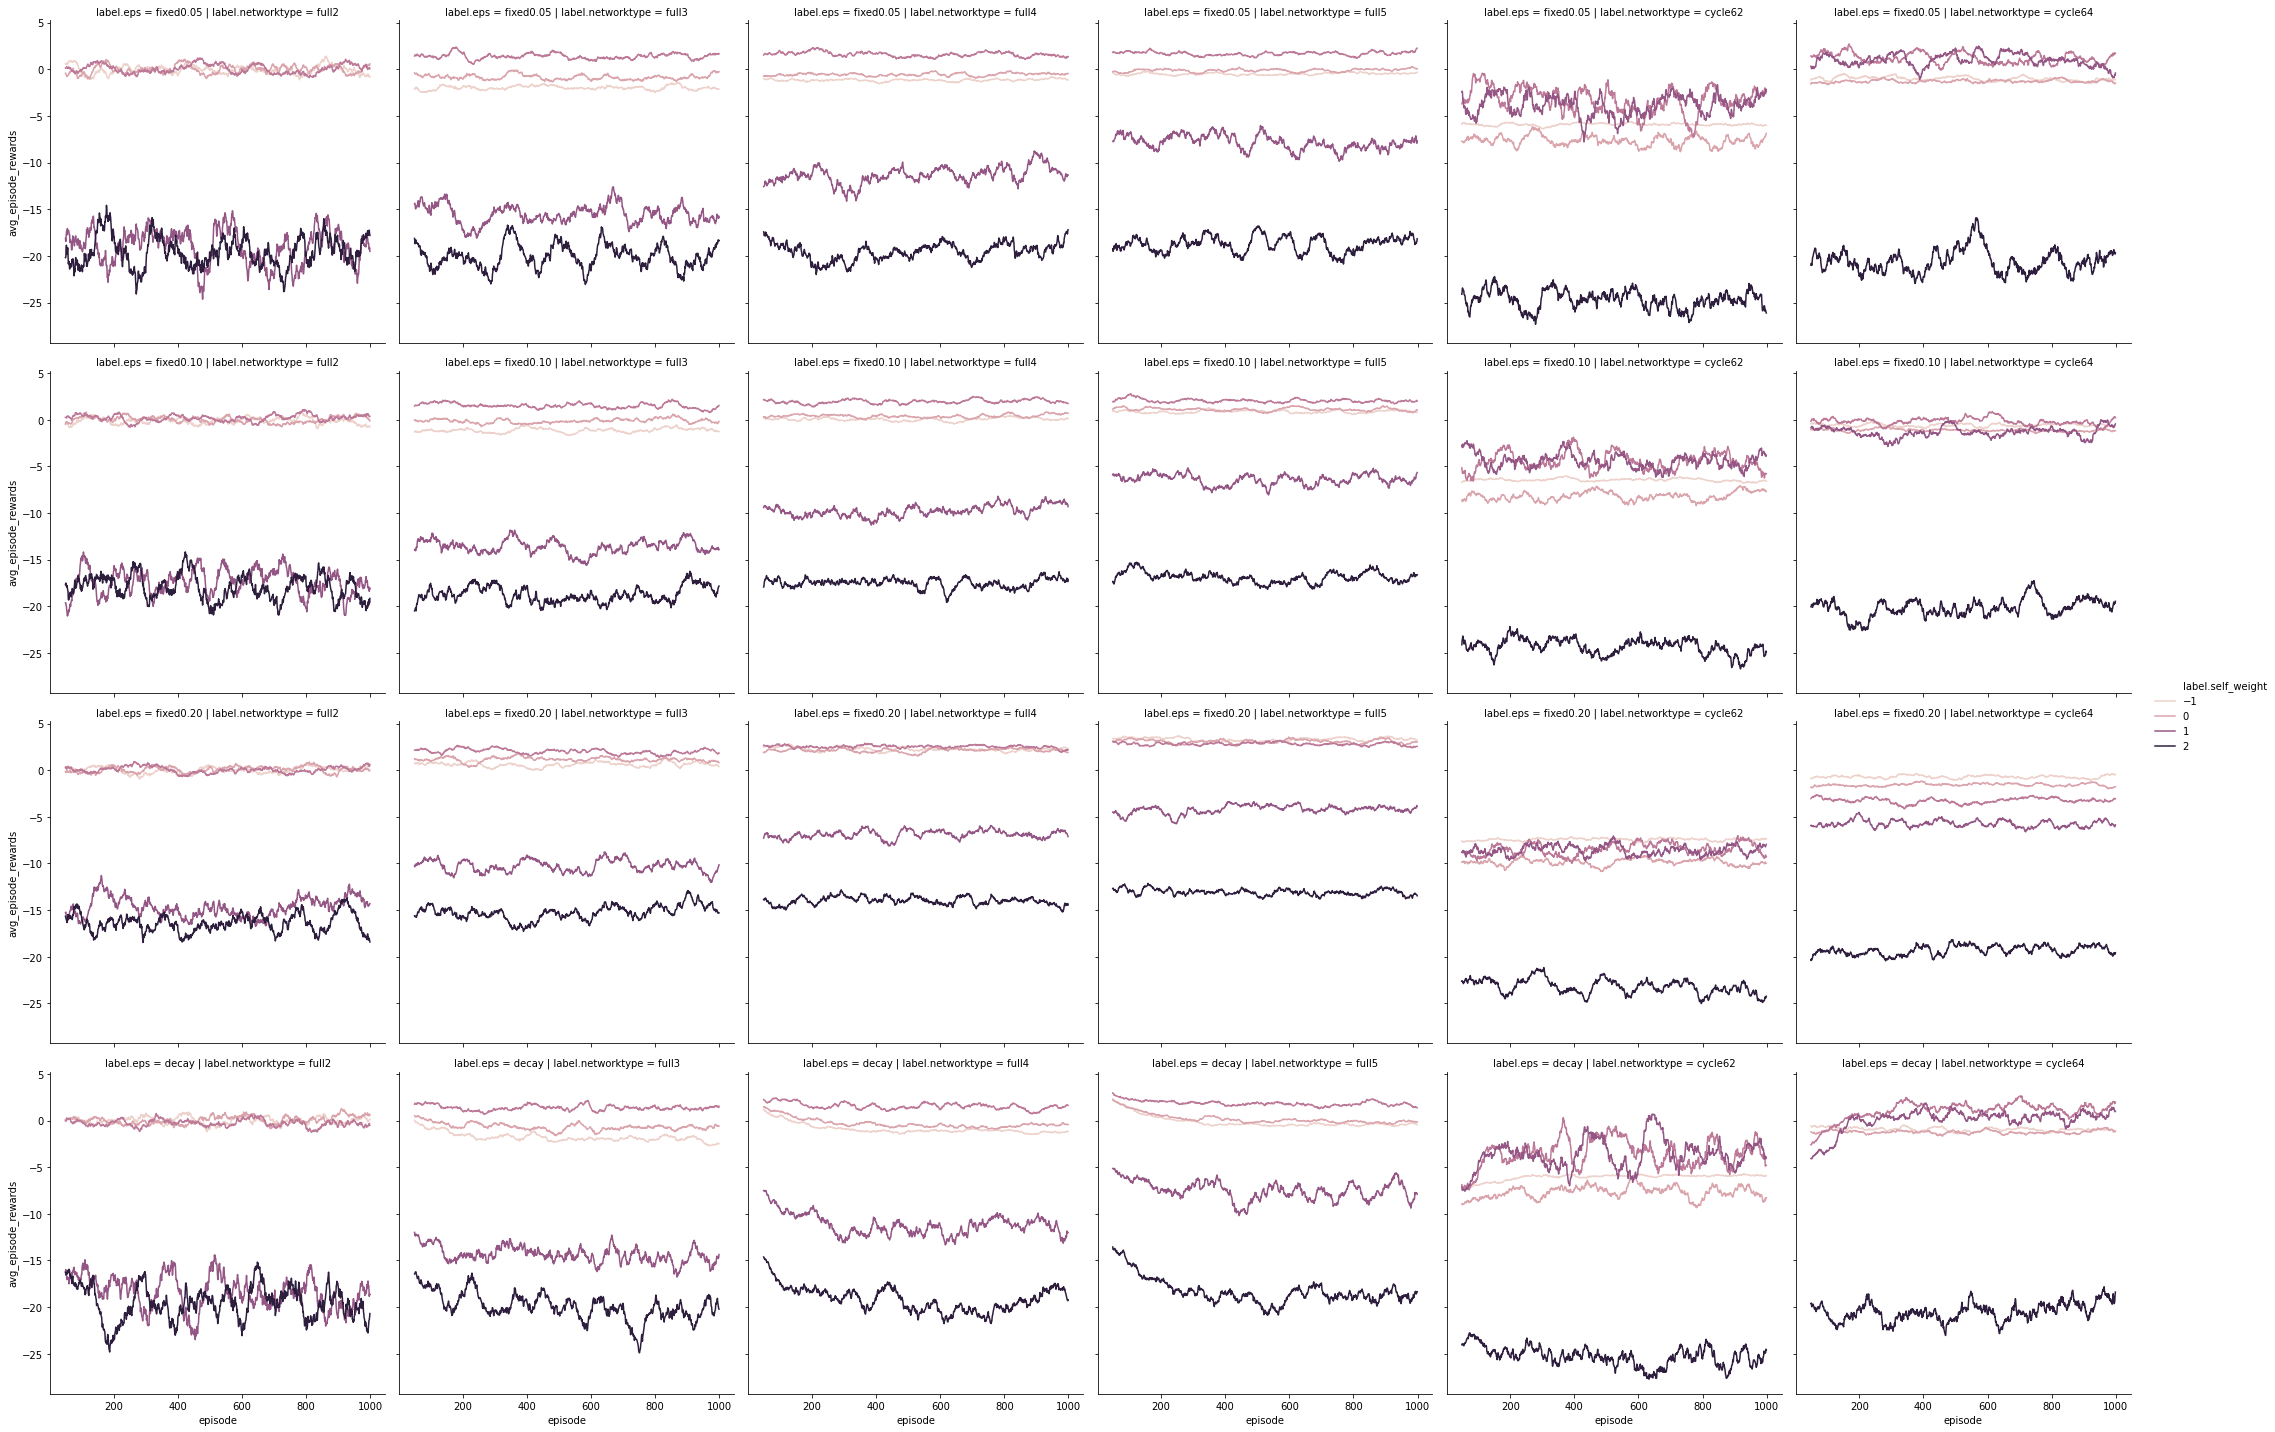

In [57]:
dfd = dft[dft['done'] & (dft["agent_type"] == 'ci') & (dft["mode"] == 'train')].copy()

columns = ['avg_episode_rewards']
window = 50
groupby = label_columns # + ['mode']
sortby = 'episode'

dfrm = dfd.groupby(groupby).rolling(on=sortby, window=window)[columns].mean().reset_index()

sns.relplot(
    data=dfrm, x='episode', y='avg_episode_rewards', row='label.eps', col="label.networktype",  
    hue="label.self_weight", kind="line", row_order=eps_order, col_order=networktype_order, ci=None)

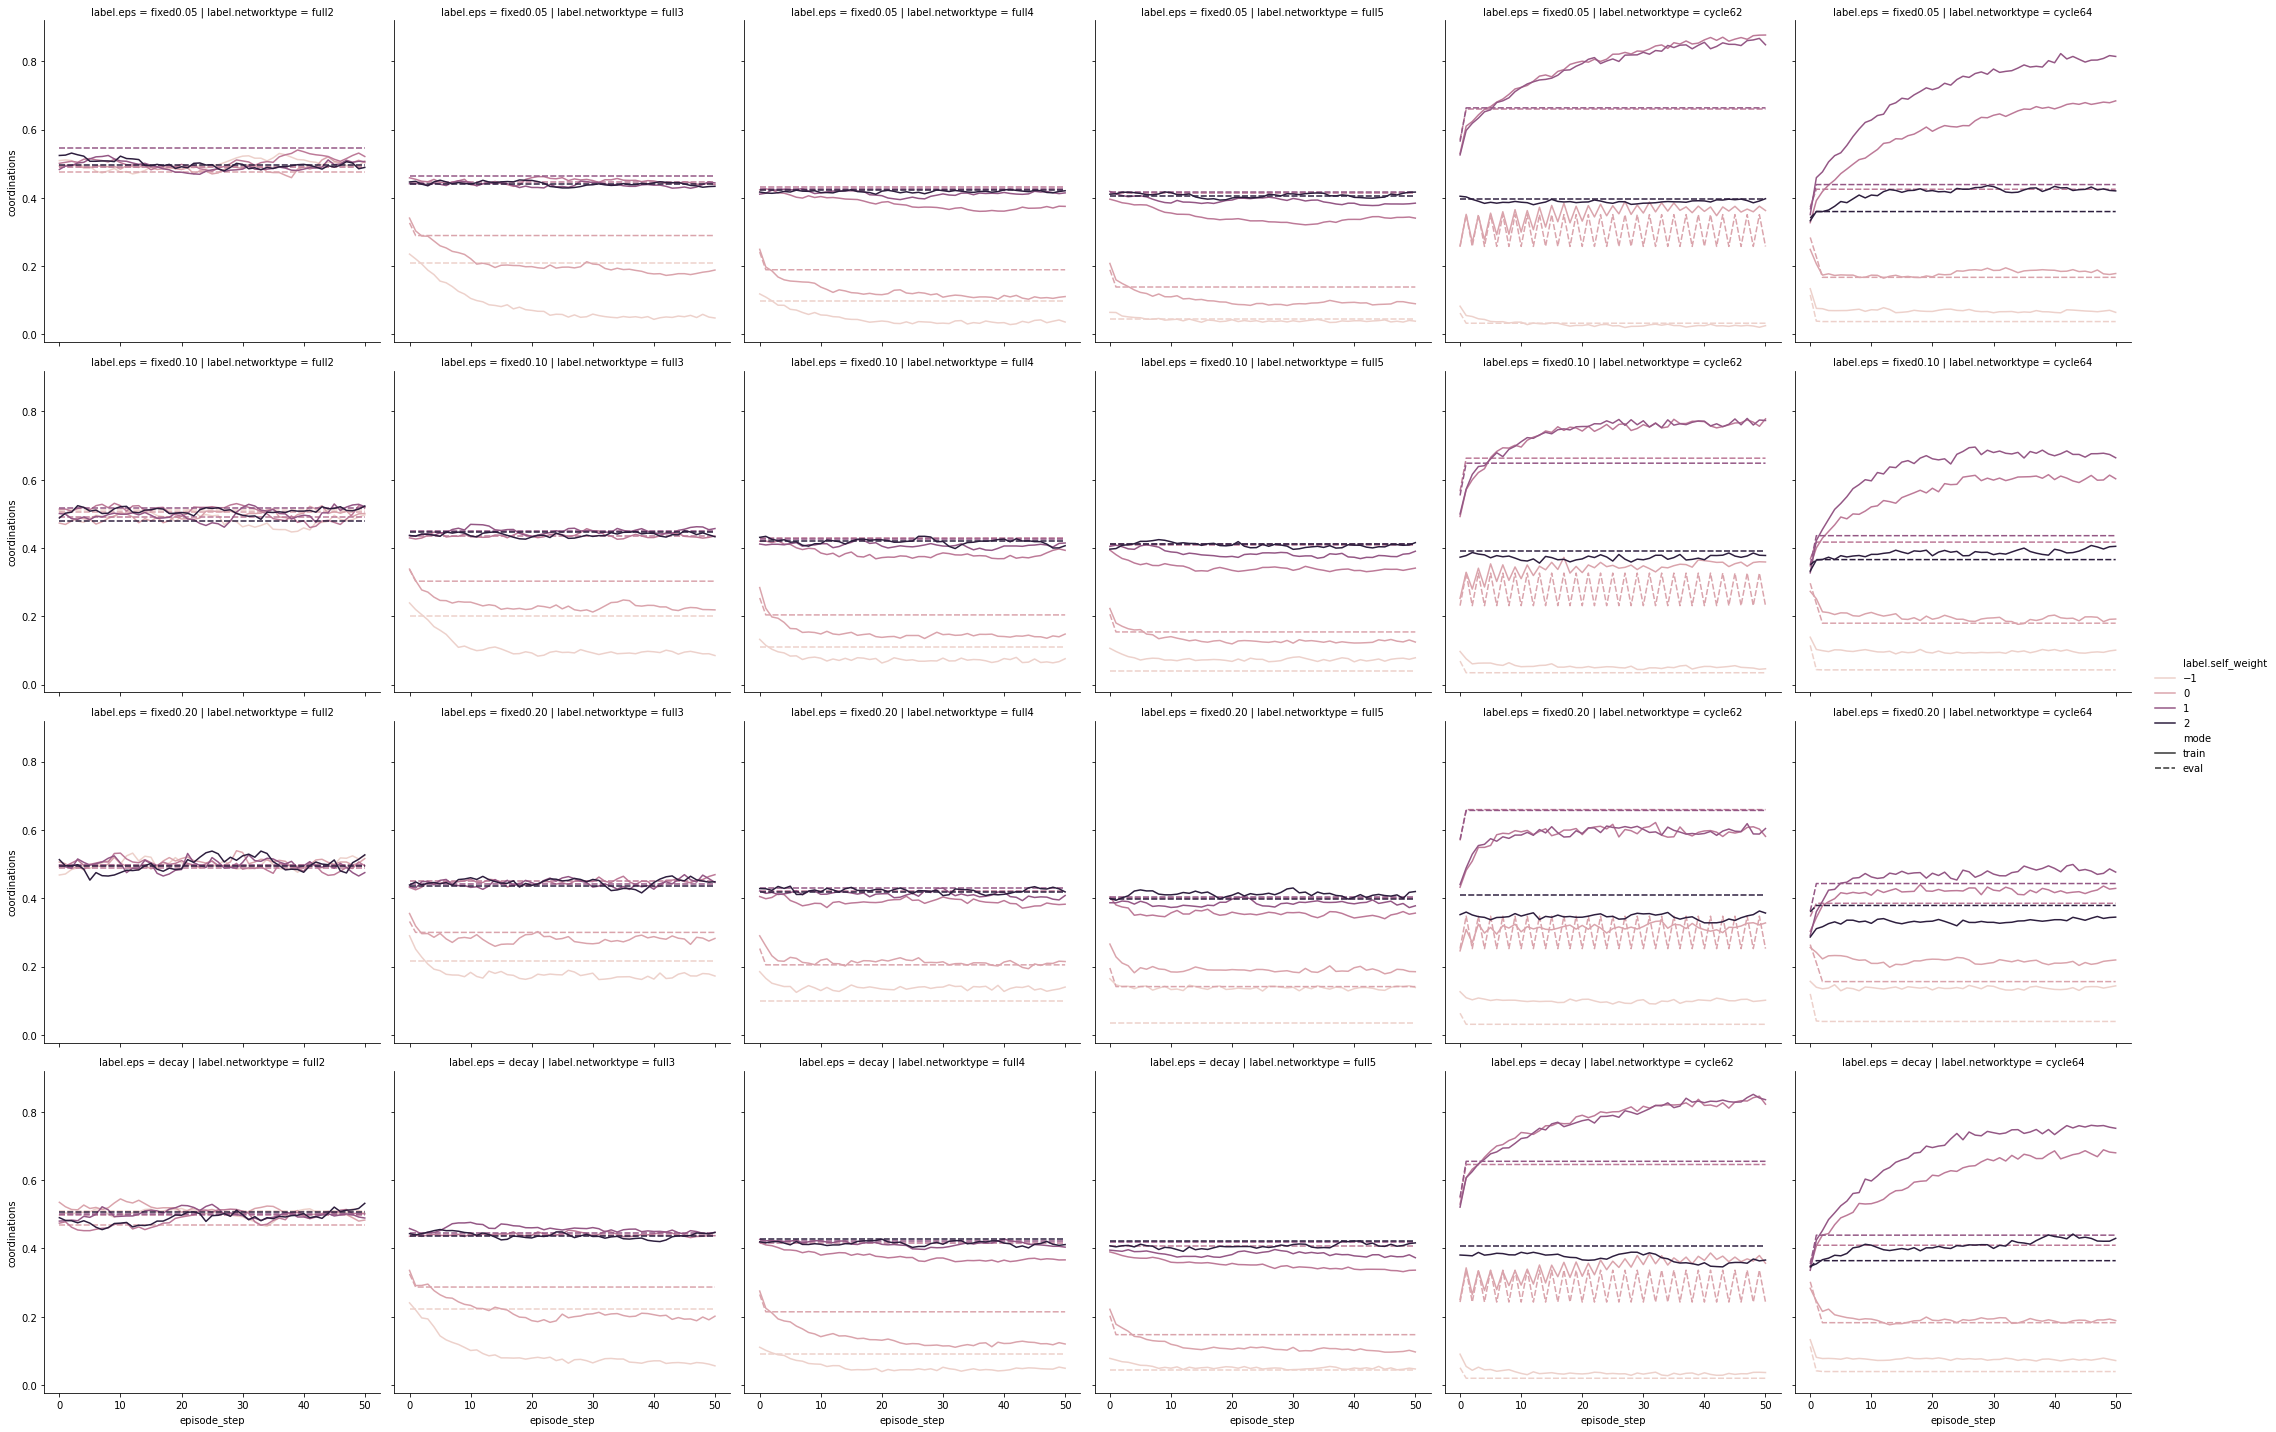

In [58]:
dfts = dft[(dft["agent_type"] == 'ci')]
sns.relplot(
    data=dfts, x='episode_step', y='coordinations', row='label.eps', style='mode', col="label.networktype",  
    hue="label.self_weight", kind="line", row_order=eps_order, col_order=networktype_order, ci=None)

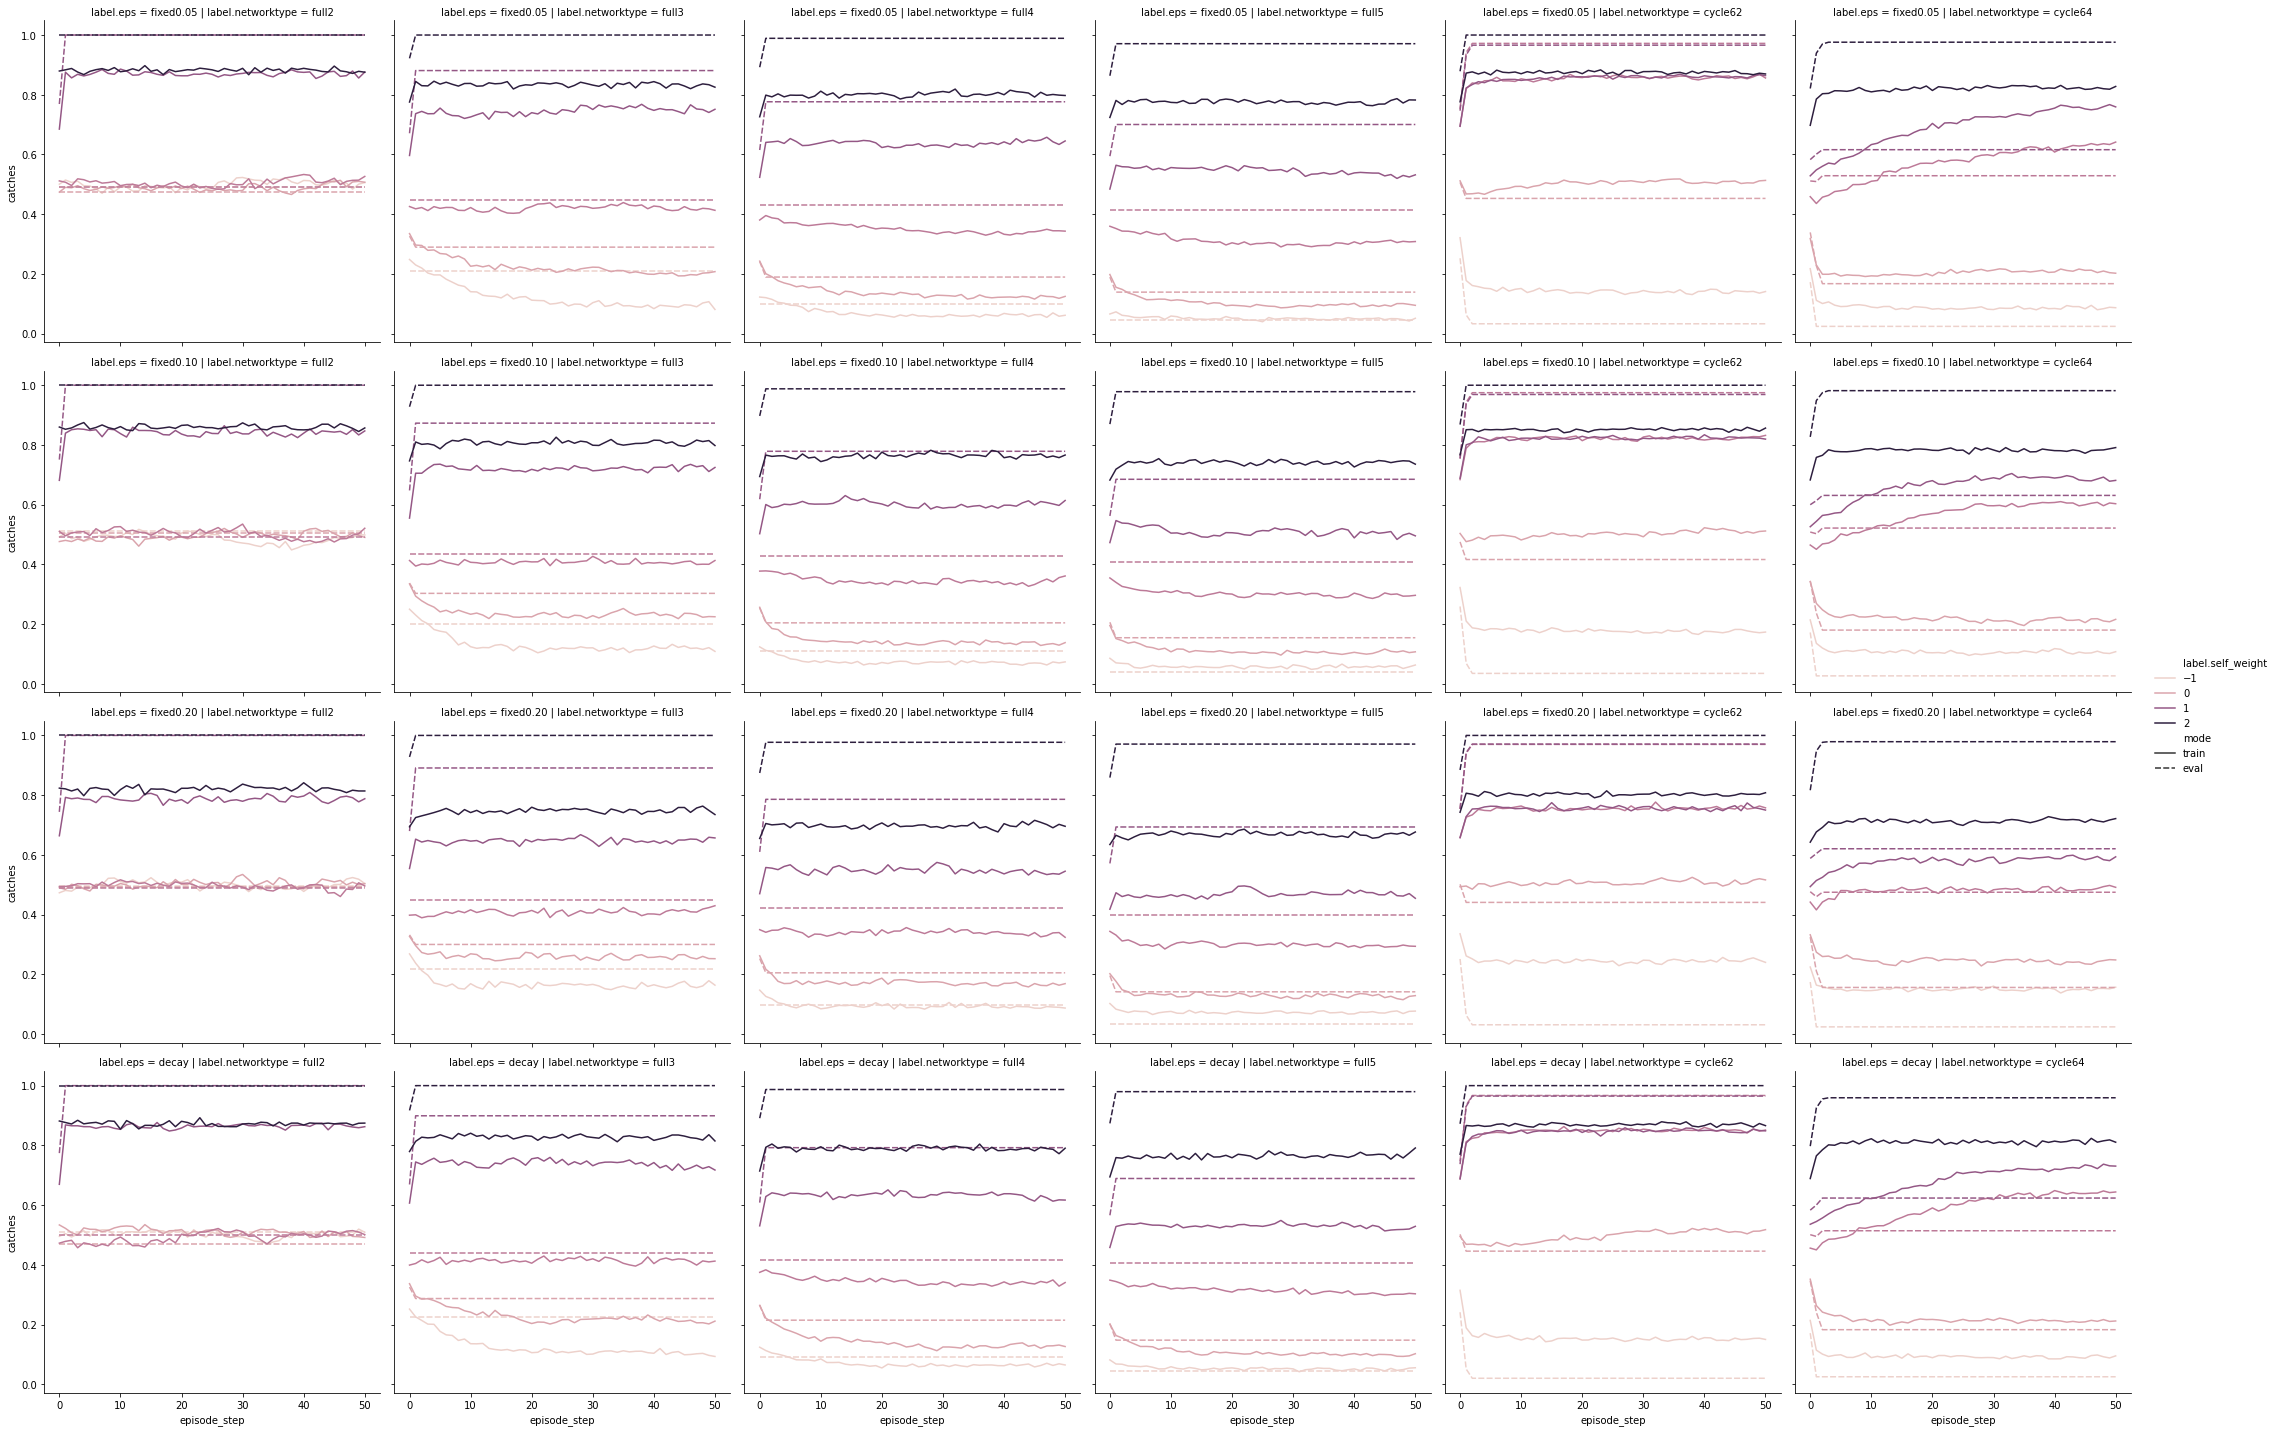

In [59]:
dfts = dft[(dft["agent_type"] == 'ai')]
sns.relplot(
    data=dfts, x='episode_step', y='catches', row='label.eps', style='mode', col="label.networktype",  
    hue="label.self_weight", kind="line", row_order=eps_order, col_order=networktype_order, ci=None)

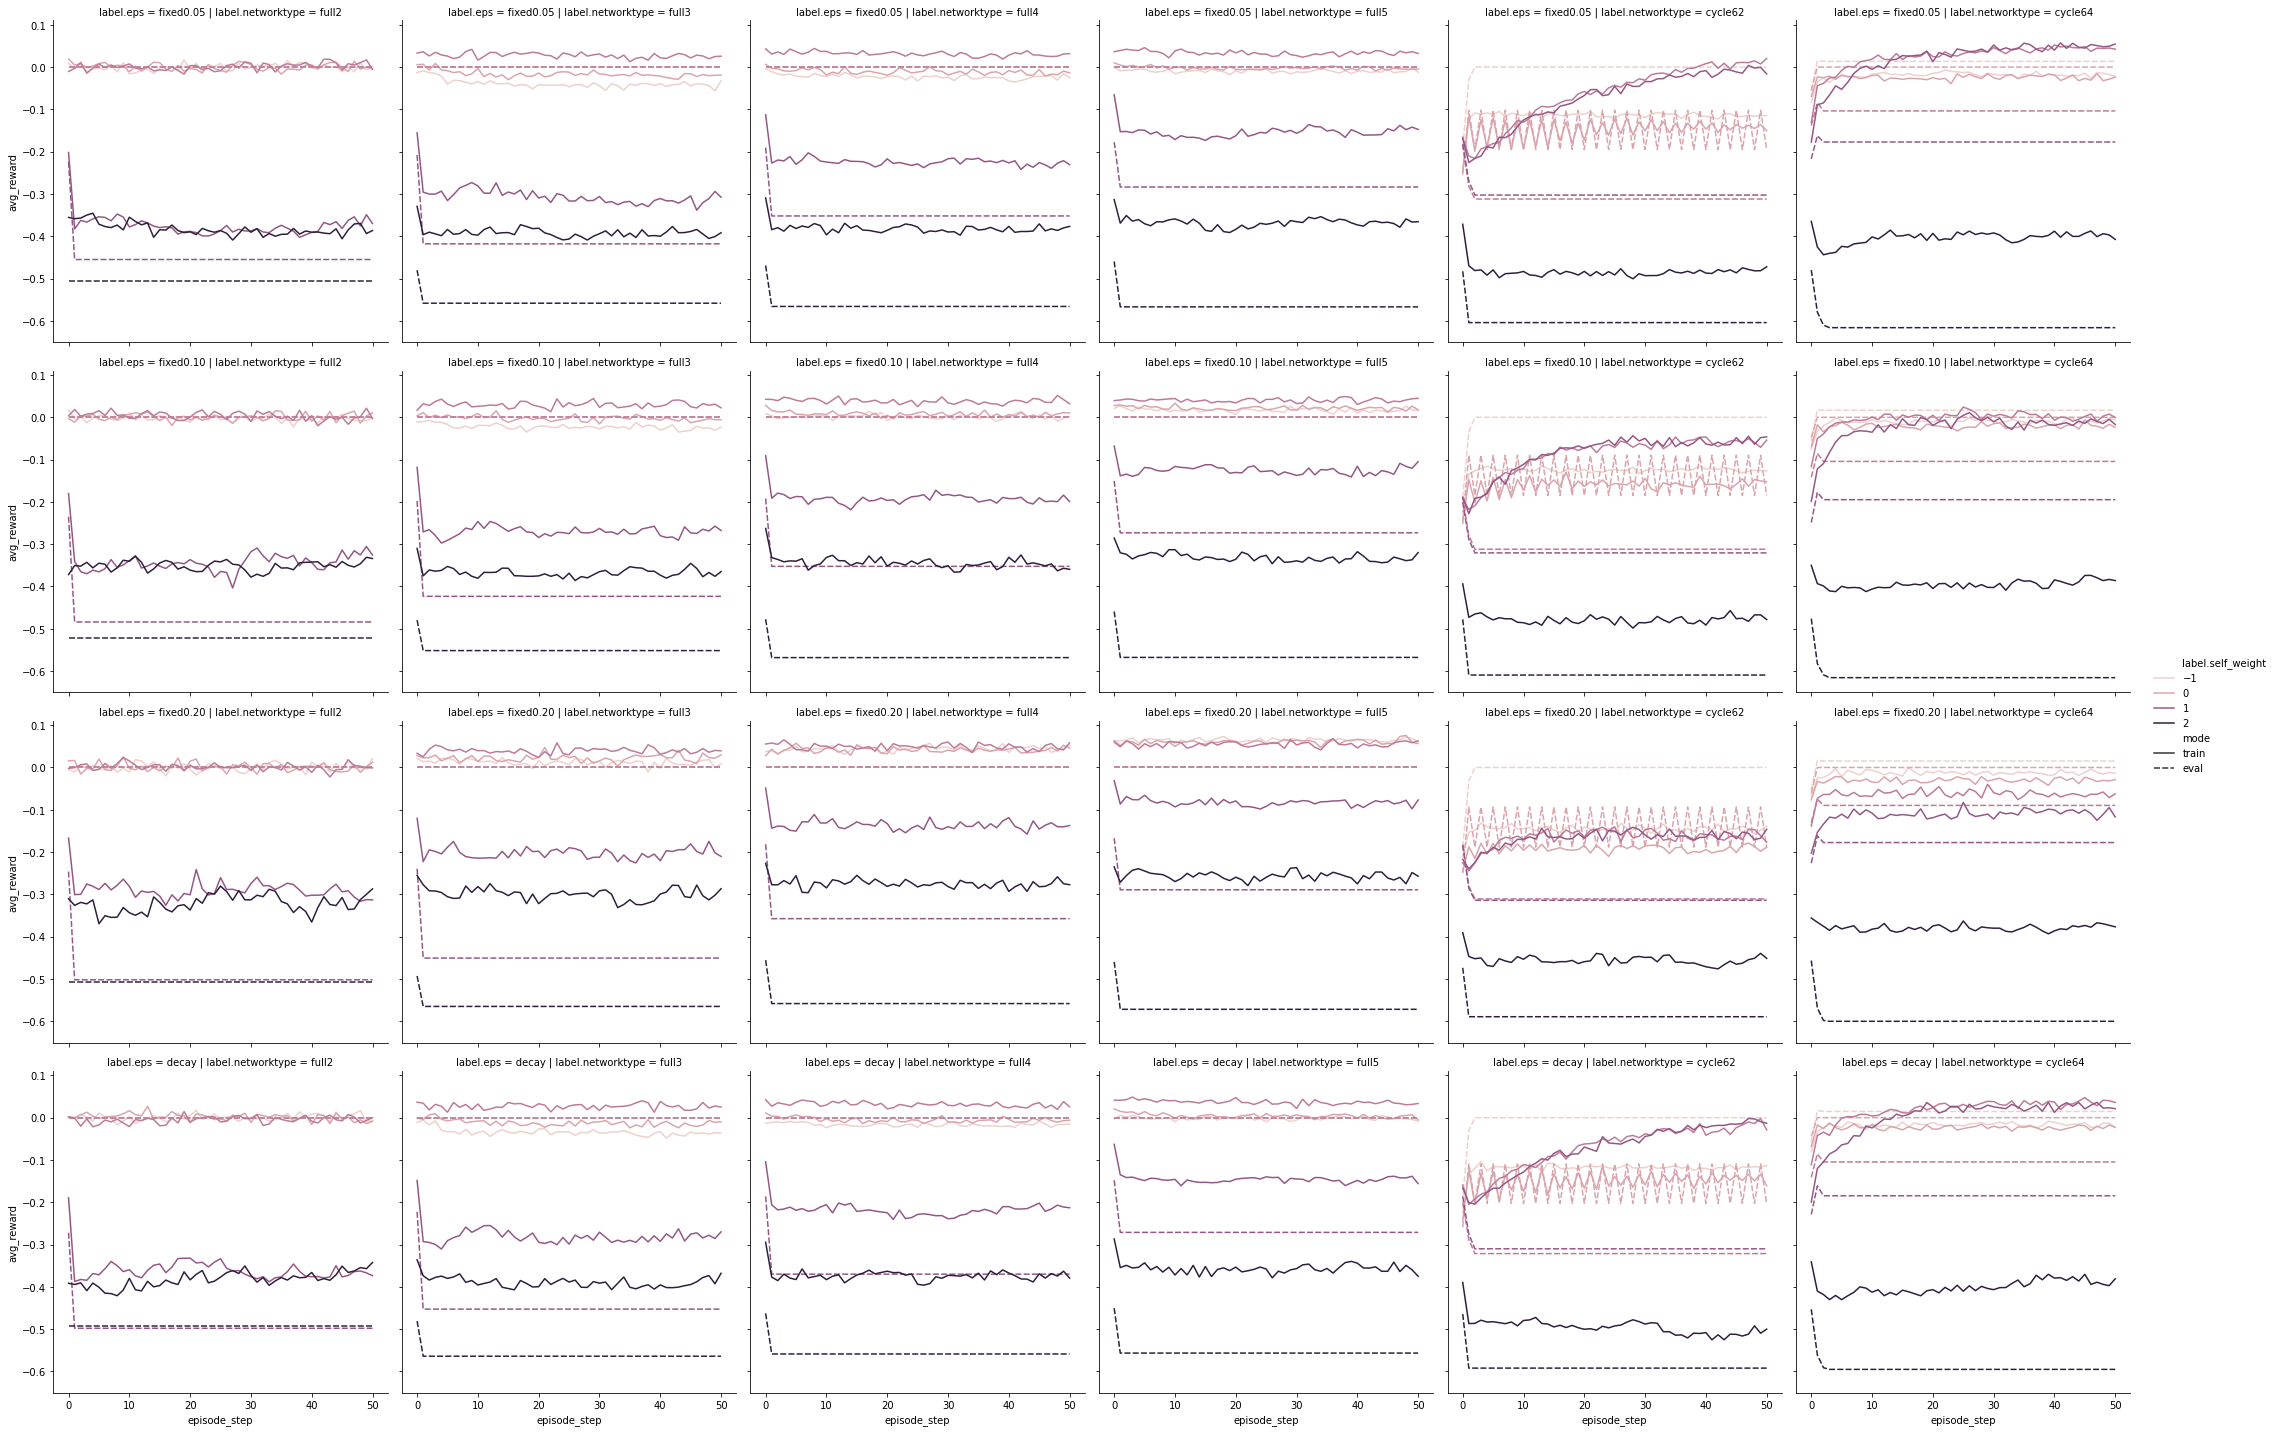

In [60]:
dfts = dft[(dft["agent_type"] == 'ci')]
sns.relplot(
    data=dfts, x='episode_step', y='avg_reward', row='label.eps', style='mode', col="label.networktype",  
    hue="label.self_weight", kind="line", row_order=eps_order, col_order=networktype_order, ci=None)

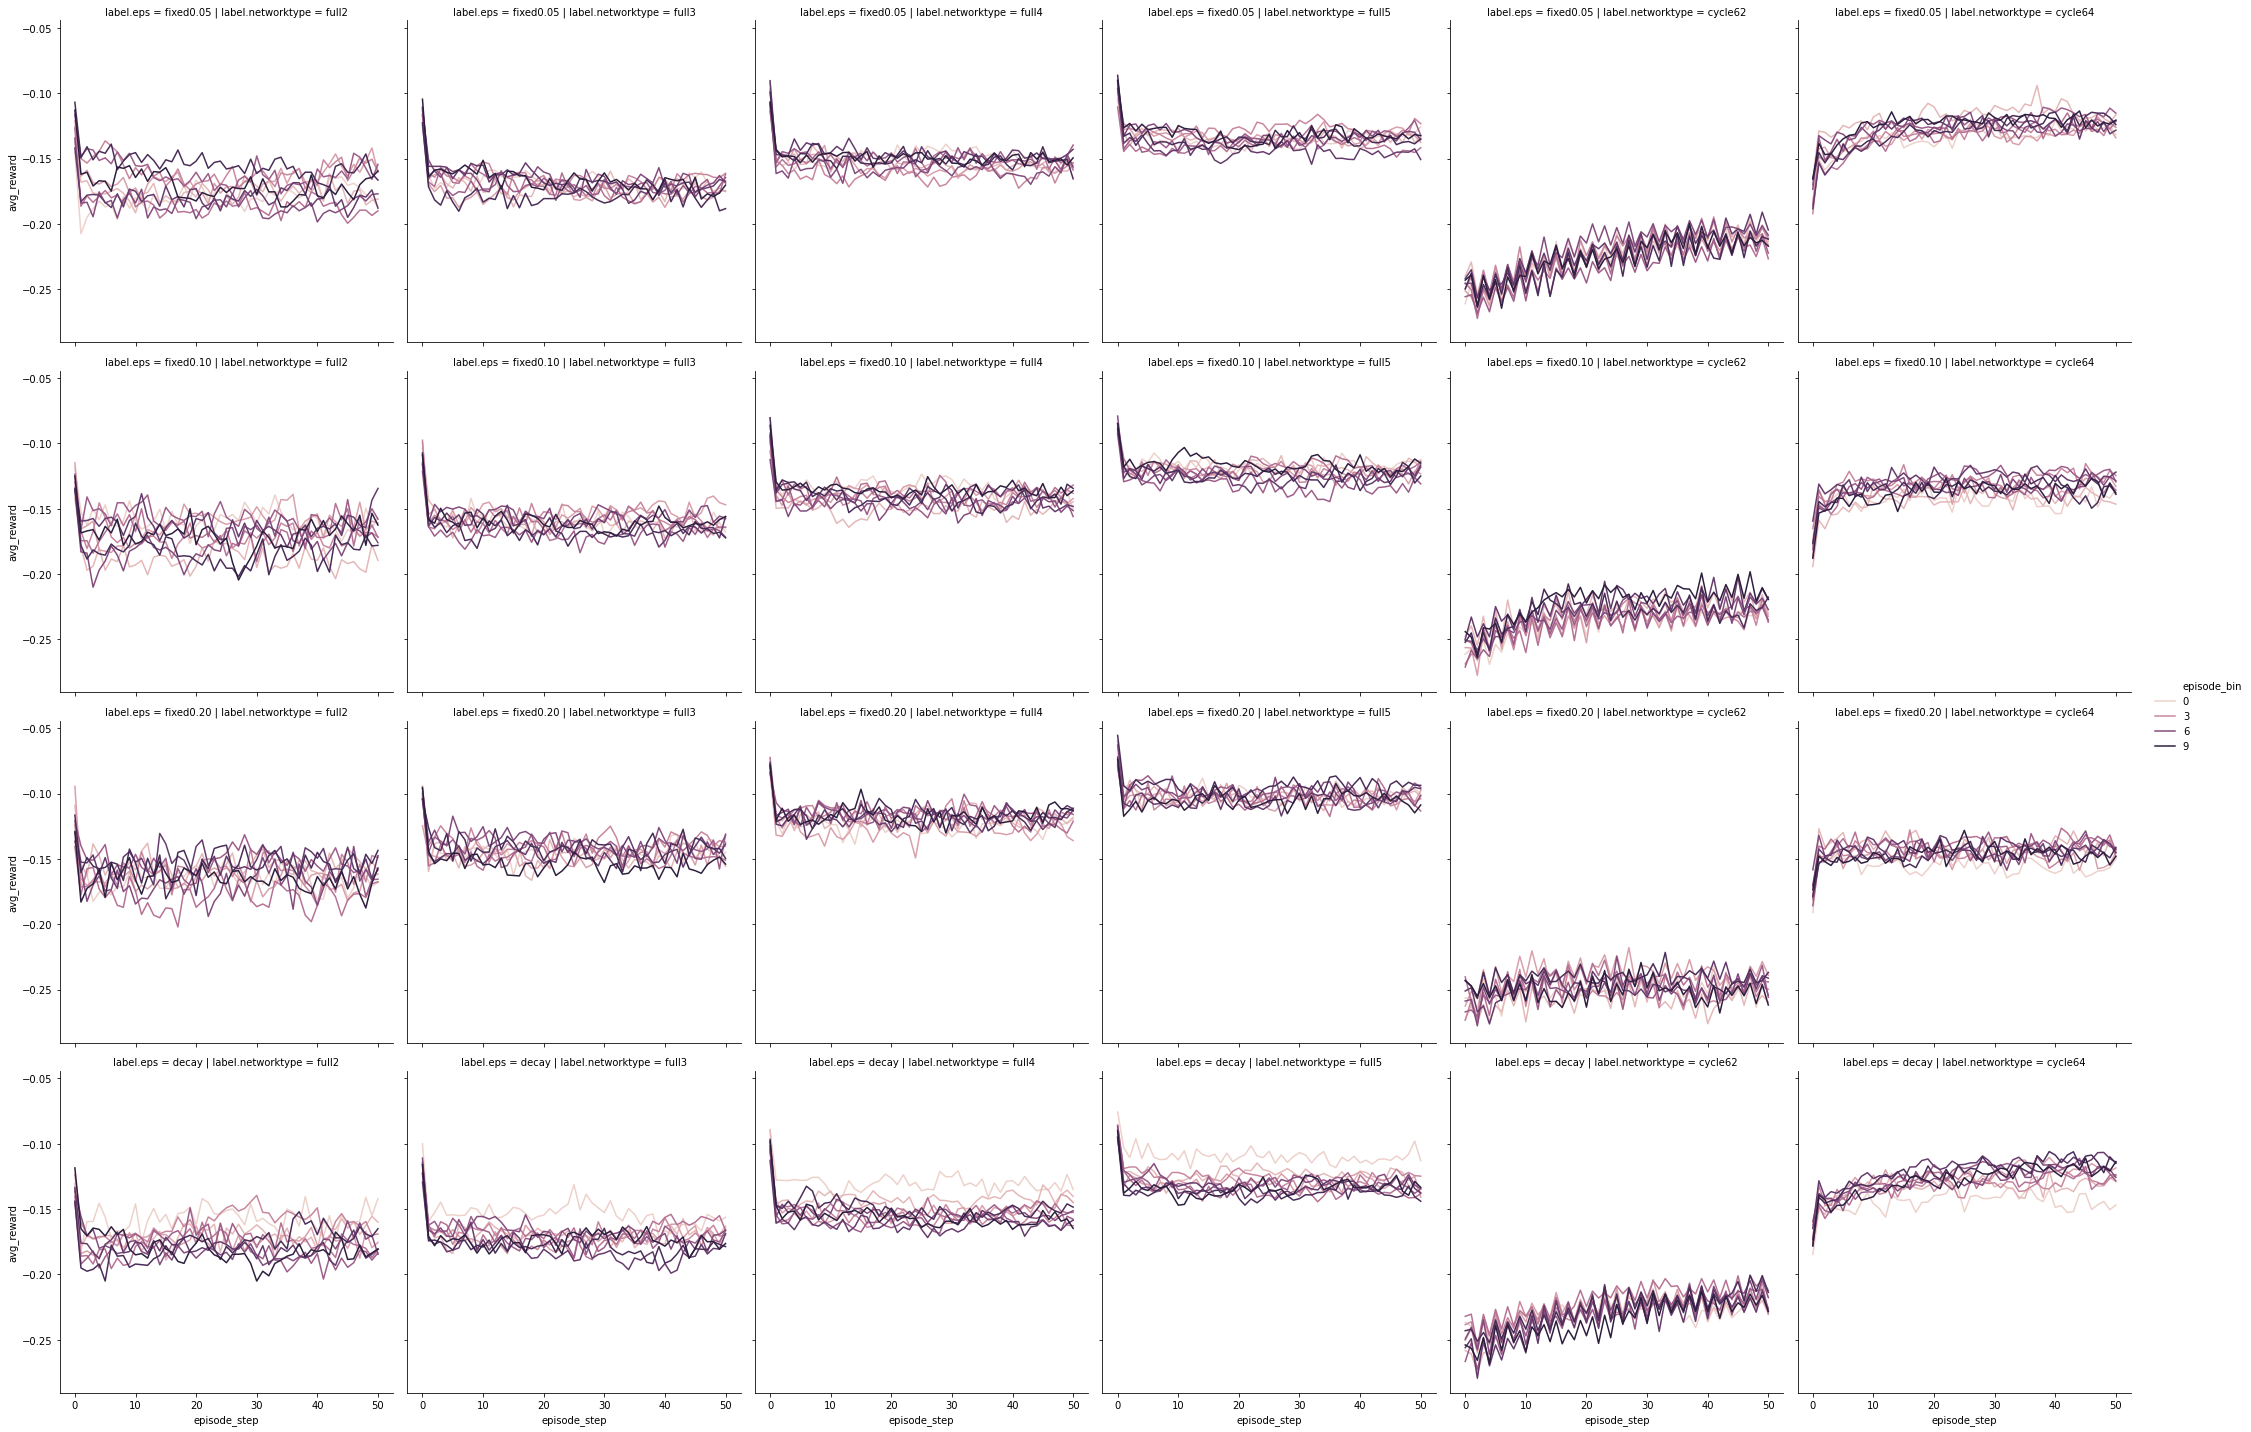

In [67]:
dfts = dft[(dft["agent_type"] == 'ci')]

dfts['episode_bin'] = dfts['episode'] // ((dfts['episode'].max() + 1) // 10)
dftss = dfts[(dfts['label.self_weight'] == 1) & (dfts['mode'] == 'train')]

sns.relplot(
    data=dfts, x='episode_step', y='avg_reward', row='label.eps', col="label.networktype",  
    hue="episode_bin", kind="line", row_order=eps_order, col_order=networktype_order, ci=None)

to be done: individual agent rewards